In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Where import *

Loading accuracy... min, max= 0.0145 0.9852


## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [3]:
path = '2018-05-31_classification_BCELoss_test.pt'

In [4]:
!ls -l {path}
!rm {path}

-rw-r--r--  1 laurentperrinet  staff  5093285 May 31 13:43 2018-05-31_classification_BCELoss_test.pt


In [5]:
if os.path.isfile(path):
    net.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    N_epochs = 1
    for epoch in range(N_epochs):          #max number of training epochs
        net = train(net, minibatch_size)                 #starting the learning
        torch.save(net.state_dict(), path) #save the neural network state
        print('Model saved at', path)

Training model...
Starting training...
[0/60000] Loss: 0.9131104350090027 Time: 0.01 mn
[10000/60000] Loss: 0.9100668430328369 Time: 0.81 mn
[20000/60000] Loss: 0.9053804278373718 Time: 1.87 mn
[30000/60000] Loss: 0.894825279712677 Time: 3.11 mn
[40000/60000] Loss: 0.8660232424736023 Time: 4.35 mn
[50000/60000] Loss: 0.7844802737236023 Time: 5.60 mn
Model saved at 2018-05-31_classification_BCELoss_test.pt


In [6]:
(data, label) = next(iter(data_loader))

Loading accuracy... min, max= 0.0145 0.9852


In [7]:
idx = 0
print(data[idx, 0, :, :].shape)

torch.Size([28, 28])


In [8]:
retina = vectorization(N_theta, N_azimuth, N_eccentricty, N_phase, N_X, N_Y, rho)


### Lancer l'évaluation

Stimulus position: (6,0)
Position prediction: (-2.0,7.0)
**************************************************


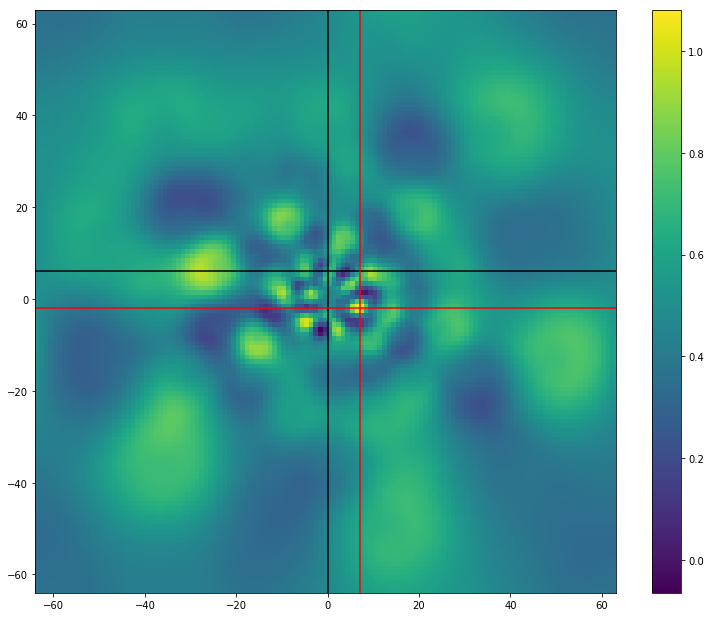

Stimulus position: (11,5)
Position prediction: (-5.0,-5.0)
**************************************************


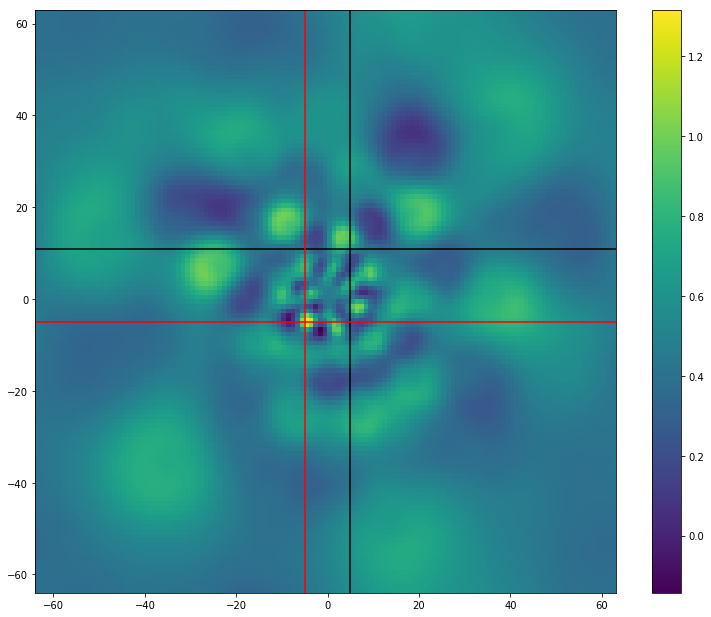

Stimulus position: (0,14)
Position prediction: (1.0,-10.0)
**************************************************


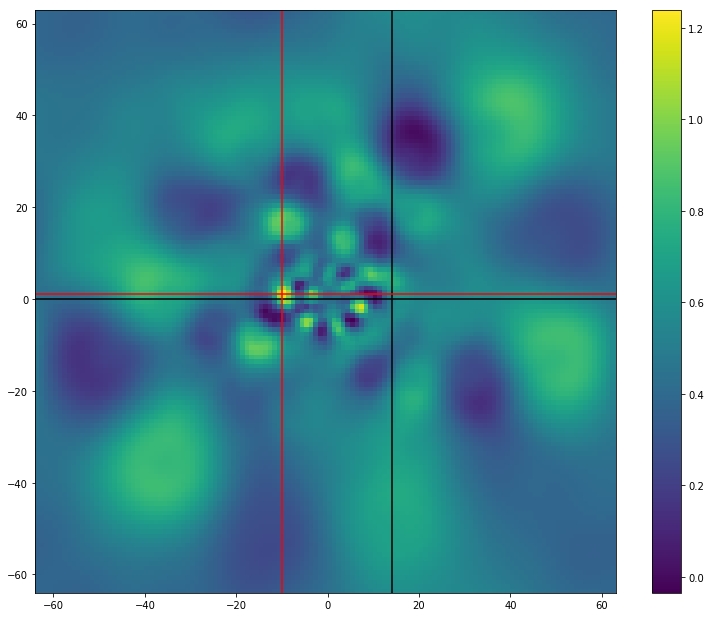

Stimulus position: (3,9)
Position prediction: (1.0,-10.0)
**************************************************


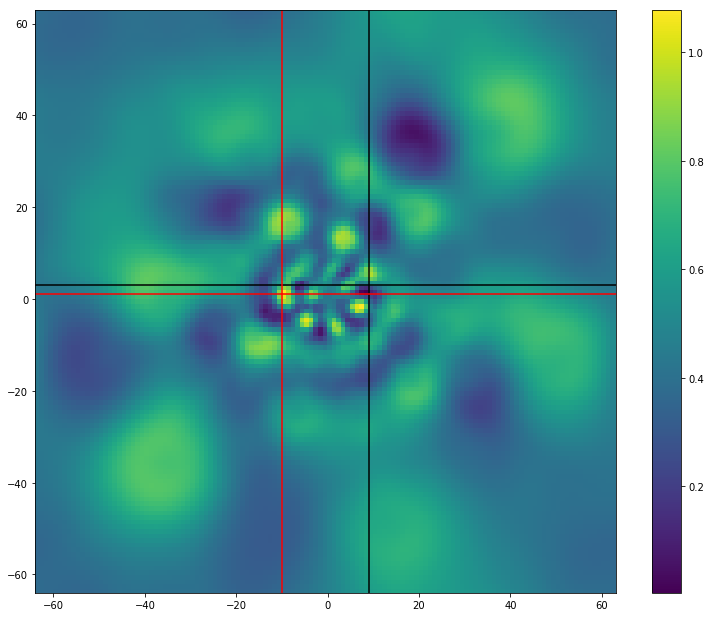

Stimulus position: (11,0)
Position prediction: (-5.0,-5.0)
**************************************************


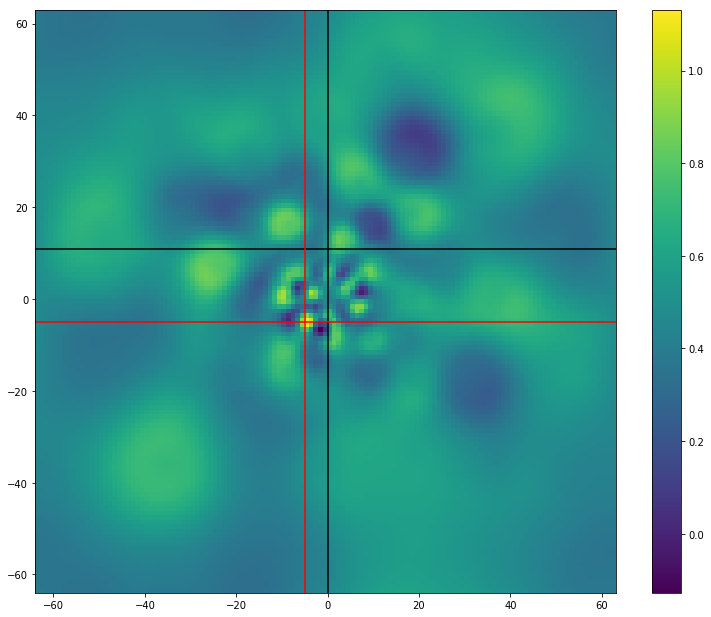

Stimulus position: (16,-2)
Position prediction: (-2.0,7.0)
**************************************************


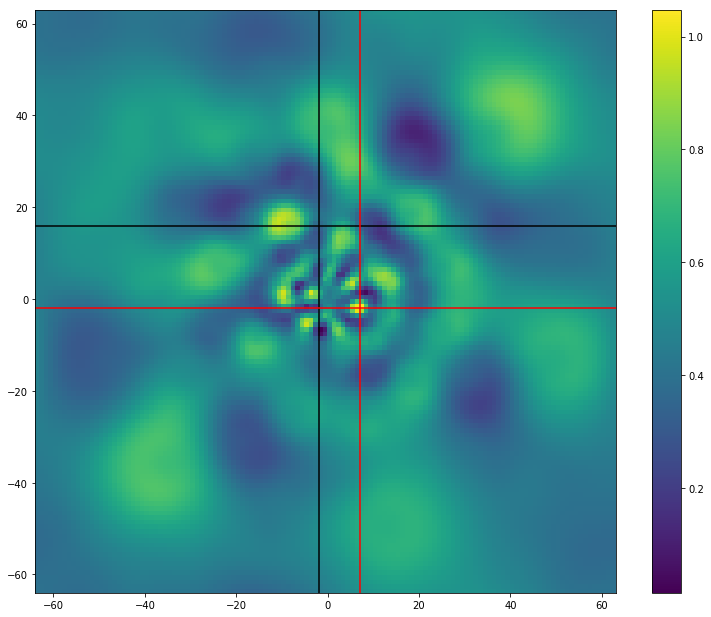

Stimulus position: (3,24)
Position prediction: (5.0,9.0)
**************************************************


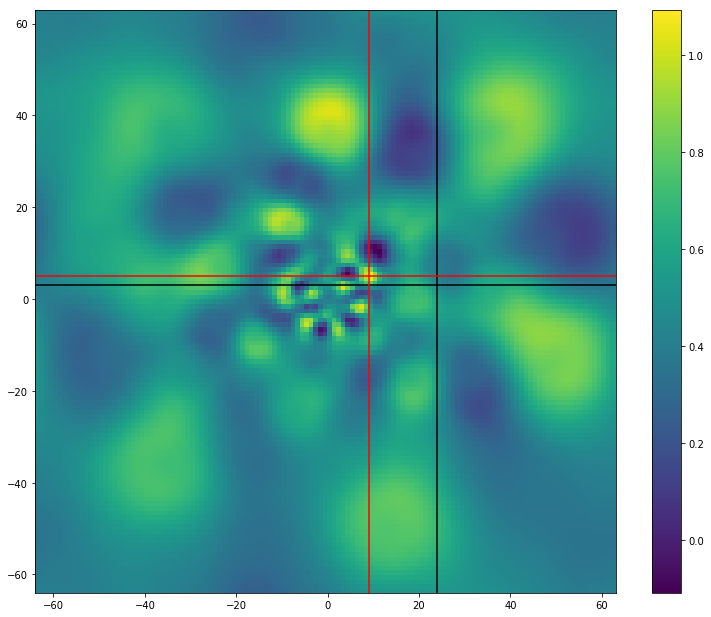

Stimulus position: (0,3)
Position prediction: (-2.0,7.0)
**************************************************


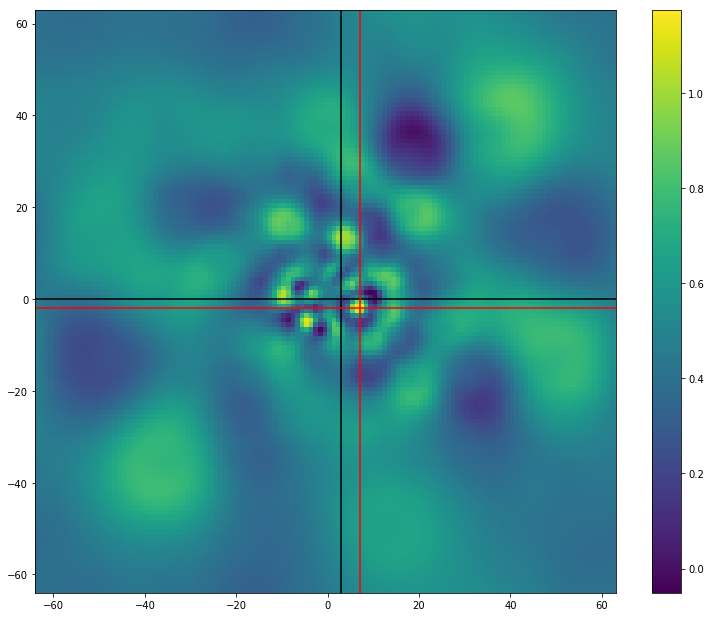

Stimulus position: (12,-5)
Position prediction: (1.0,-4.0)
**************************************************


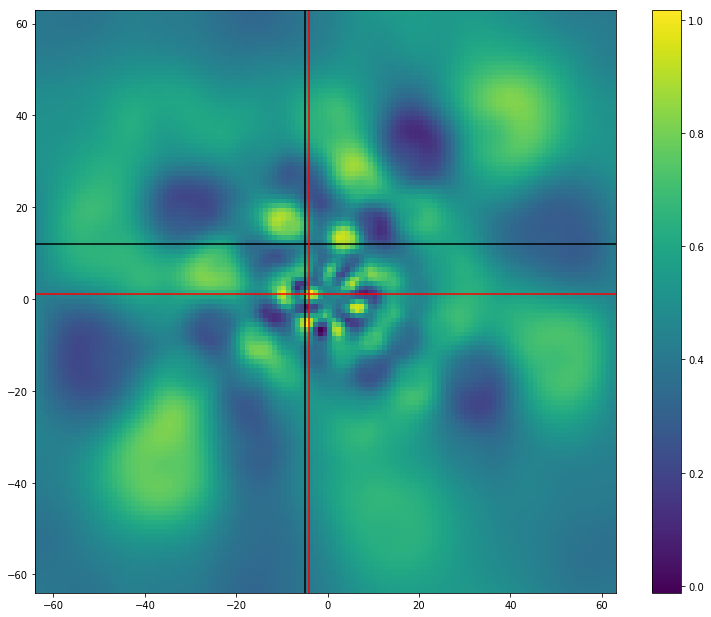

Stimulus position: (-8,-11)
Position prediction: (1.0,-4.0)
**************************************************


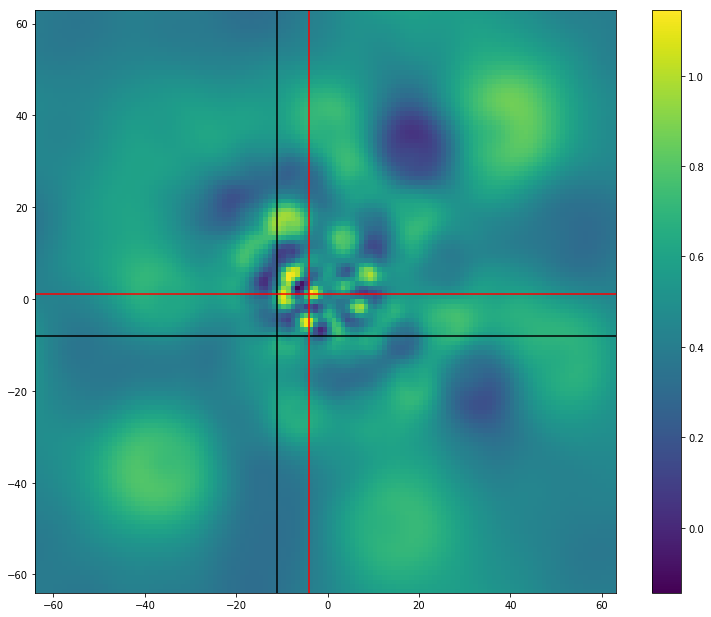

In [9]:
N_test = 10

for _ in range(N_test):
    eval_sacc()
    plt.show()    

Stimulus position: (1,0)
(96,)
Loading pred_data... min, max= 0.4721868 0.5258421
a_data position (log_r, azimuth) = (-0.17835020695190695,-1.5707963267948966)
**************************************************


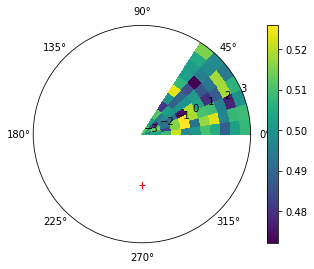

Stimulus position: (2,16)
(96,)
Loading pred_data... min, max= 0.46837425 0.52861995
a_data position (log_r, azimuth) = (0.37771795614964565,-0.12435499454676144)
**************************************************


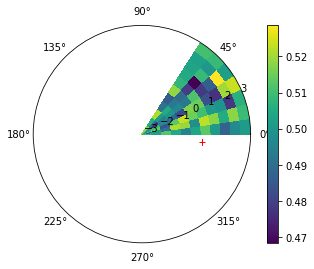

Stimulus position: (2,-16)
(96,)
Loading pred_data... min, max= 0.47636005 0.529546
a_data position (log_r, azimuth) = (0.37771795614964565,0.12435499454676144)
**************************************************


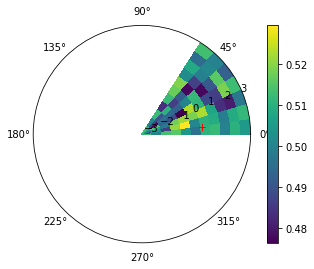

Stimulus position: (-1,-6)
(96,)
Loading pred_data... min, max= 0.47140062 0.5351597
a_data position (log_r, azimuth) = (0.18274158431251541,-0.16514867741462683)
**************************************************


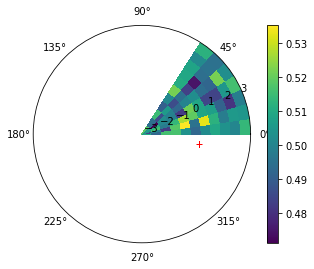

Stimulus position: (-5,4)
(96,)
Loading pred_data... min, max= 0.471562 0.5247649
a_data position (log_r, azimuth) = (0.19300699971852375,0.8960553845713439)
**************************************************


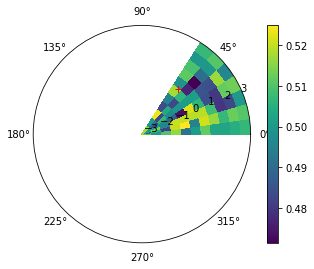

Stimulus position: (4,0)
(96,)
Loading pred_data... min, max= 0.47389957 0.53187674
a_data position (log_r, azimuth) = (0.0989086652720712,-1.5707963267948966)
**************************************************


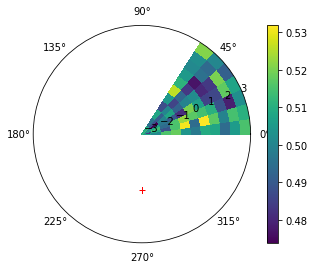

Stimulus position: (-19,-4)
(96,)
Loading pred_data... min, max= 0.4725232 0.53007203
a_data position (log_r, azimuth) = (0.414874311792894,-1.3633001003596938)
**************************************************


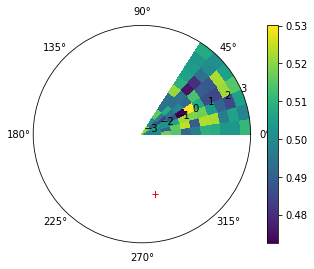

Stimulus position: (-1,-9)
(96,)
Loading pred_data... min, max= 0.4758969 0.5294264
a_data position (log_r, azimuth) = (0.2623217177745183,-0.11065722117389563)
**************************************************


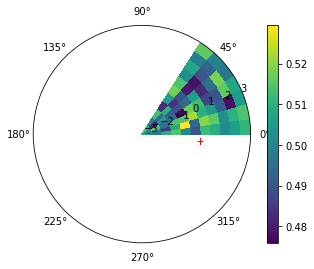

Stimulus position: (11,-19)
(96,)
Loading pred_data... min, max= 0.4731144 0.53255236
a_data position (log_r, azimuth) = (0.439444204453153,0.5247957716501074)
**************************************************


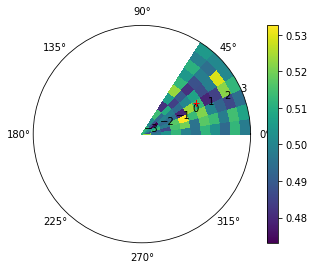

Stimulus position: (4,-8)
(96,)
Loading pred_data... min, max= 0.4716478 0.53322595
a_data position (log_r, azimuth) = (0.25985245651548117,0.46364760900080615)
**************************************************


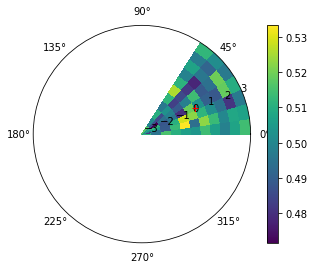

In [10]:
for _ in range(N_test):
    eval_sacc(fig_type='log')
    plt.show()    

In [11]:
eccentricty, azimuth = np.meshgrid(np.linspace(0, 1, N_eccentricty+1), np.linspace(-np.pi, np.pi, N_azimuth+1))
eccentricty.shape, azimuth.shape

((13, 9), (13, 9))

In [12]:
help(plt.pcolor
    )

Help on function pcolor in module matplotlib.pyplot:

pcolor(*args, **kwargs)
    Create a pseudocolor plot of a 2-D array.
    
    Call signatures::
    
        pcolor(C, **kwargs)
        pcolor(X, Y, C, **kwargs)
    
    pcolor can be very slow for large arrays; consider
    using the similar but much faster
    :func:`~matplotlib.pyplot.pcolormesh` instead.
    
    Parameters
    ----------
    C : array_like
        An array of color values.
    
    X, Y : array_like, optional
        If given, specify the (x, y) coordinates of the colored
        quadrilaterals; the quadrilateral for ``C[i,j]`` has corners at::
    
            (X[i,   j],   Y[i,   j]),
            (X[i,   j+1], Y[i,   j+1]),
            (X[i+1, j],   Y[i+1, j]),
            (X[i+1, j+1], Y[i+1, j+1])
    
        Ideally the dimensions of ``X`` and ``Y`` should be one greater
        than those of ``C``; if the dimensions are the same, then the last
        row and column of ``C`` will be ignored.
    
    